# Example 2: BUILD A MULTIPLE LAYER PERCEPTRON FOR CANCER CLASSIFICATION 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# example making new class predictions for a classification problem
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler


Using TensorFlow backend.


In [3]:
# Import Cancer data drom the Sklearn library
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))


In [4]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [5]:
X = df_cancer.iloc[:,[0,1]]
X

,mean radius,mean texture
0,17.990,10.38
1,20.570,17.77
2,19.690,21.25
3,11.420,20.38
4,20.290,14.34
5,12.450,15.70
6,18.250,19.98
7,13.710,20.83
8,13.000,21.82
9,12.460,24.04


In [6]:
y = df_cancer['target']
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     1.0
20     1.0
21     1.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
539    1.0
540    1.0
541    1.0
542    1.0
543    1.0
544    1.0
545    1.0
546    1.0
547    1.0
548    1.0
549    1.0
550    1.0
551    1.0
552    1.0
553    1.0
554    1.0
555    1.0
556    1.0
557    1.0
558    1.0
559    1.0
560    1.0
561    1.0
562    0.0
563    0.0
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

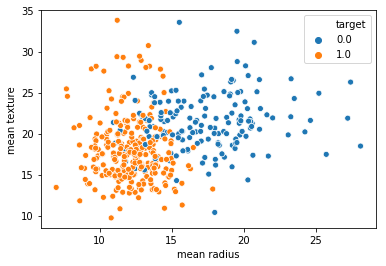

In [7]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sns.scatterplot(x = X_train['mean radius'], y = X_train['mean texture'], hue = y_train)

In [8]:
scalar = MinMaxScaler()
scalar.fit(X_train)
X_train_scaled = scalar.transform(X_train)


scalar = MinMaxScaler()
scalar.fit(X_test)
X_test_scaled = scalar.transform(X_test)


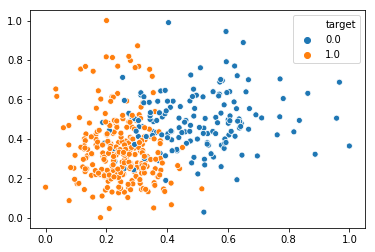

In [9]:

sns.scatterplot(X_train_scaled[:,0], X_train_scaled[:,1], hue=y_train)

In [10]:
# define and fit the final model
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
#model.add(Dense(4, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train_scaled, y_train, epochs=500, verbose=2)



Epoch 1/500
 - 0s - loss: 0.6944
Epoch 2/500
 - 0s - loss: 0.6933
Epoch 3/500
 - 0s - loss: 0.6924
Epoch 4/500
 - 0s - loss: 0.6915
Epoch 5/500
 - 0s - loss: 0.6906
Epoch 6/500
 - 0s - loss: 0.6896
Epoch 7/500
 - 0s - loss: 0.6888
Epoch 8/500
 - 0s - loss: 0.6878
Epoch 9/500
 - 0s - loss: 0.6869
Epoch 10/500
 - 0s - loss: 0.6860
Epoch 11/500
 - 0s - loss: 0.6851
Epoch 12/500
 - 0s - loss: 0.6842
Epoch 13/500
 - 0s - loss: 0.6834
Epoch 14/500
 - 0s - loss: 0.6826
Epoch 15/500
 - 0s - loss: 0.6817
Epoch 16/500
 - 0s - loss: 0.6808
Epoch 17/500
 - 0s - loss: 0.6800
Epoch 18/500
 - 0s - loss: 0.6791
Epoch 19/500
 - 0s - loss: 0.6783
Epoch 20/500
 - 0s - loss: 0.6774
Epoch 21/500
 - 0s - loss: 0.6766
Epoch 22/500
 - 0s - loss: 0.6758
Epoch 23/500
 - 0s - loss: 0.6749
Epoch 24/500
 - 0s - loss: 0.6740
Epoch 25/500
 - 0s - loss: 0.6732
Epoch 26/500
 - 0s - loss: 0.6723
Epoch 27/500
 - 0s - loss: 0.6715
Epoch 28/500
 - 0s - loss: 0.6707
Epoch 29/500
 - 0s - loss: 0.6698
Epoch 30/500
 - 0s - lo

 - 0s - loss: 0.5321
Epoch 239/500
 - 0s - loss: 0.5316
Epoch 240/500
 - 0s - loss: 0.5311
Epoch 241/500
 - 0s - loss: 0.5306
Epoch 242/500
 - 0s - loss: 0.5300
Epoch 243/500
 - 0s - loss: 0.5295
Epoch 244/500
 - 0s - loss: 0.5290
Epoch 245/500
 - 0s - loss: 0.5285
Epoch 246/500
 - 0s - loss: 0.5280
Epoch 247/500
 - 0s - loss: 0.5275
Epoch 248/500
 - 0s - loss: 0.5270
Epoch 249/500
 - 0s - loss: 0.5266
Epoch 250/500
 - 0s - loss: 0.5261
Epoch 251/500
 - 0s - loss: 0.5256
Epoch 252/500
 - 0s - loss: 0.5251
Epoch 253/500
 - 0s - loss: 0.5246
Epoch 254/500
 - 0s - loss: 0.5241
Epoch 255/500
 - 0s - loss: 0.5236
Epoch 256/500
 - 0s - loss: 0.5231
Epoch 257/500
 - 0s - loss: 0.5226
Epoch 258/500
 - 0s - loss: 0.5221
Epoch 259/500
 - 0s - loss: 0.5216
Epoch 260/500
 - 0s - loss: 0.5211
Epoch 261/500
 - 0s - loss: 0.5207
Epoch 262/500
 - 0s - loss: 0.5202
Epoch 263/500
 - 0s - loss: 0.5197
Epoch 264/500
 - 0s - loss: 0.5192
Epoch 265/500
 - 0s - loss: 0.5187
Epoch 266/500
 - 0s - loss: 0.5182

Epoch 473/500
 - 0s - loss: 0.4395
Epoch 474/500
 - 0s - loss: 0.4392
Epoch 475/500
 - 0s - loss: 0.4389
Epoch 476/500
 - 0s - loss: 0.4386
Epoch 477/500
 - 0s - loss: 0.4383
Epoch 478/500
 - 0s - loss: 0.4380
Epoch 479/500
 - 0s - loss: 0.4377
Epoch 480/500
 - 0s - loss: 0.4374
Epoch 481/500
 - 0s - loss: 0.4372
Epoch 482/500
 - 0s - loss: 0.4369
Epoch 483/500
 - 0s - loss: 0.4366
Epoch 484/500
 - 0s - loss: 0.4363
Epoch 485/500
 - 0s - loss: 0.4360
Epoch 486/500
 - 0s - loss: 0.4357
Epoch 487/500
 - 0s - loss: 0.4354
Epoch 488/500
 - 0s - loss: 0.4351
Epoch 489/500
 - 0s - loss: 0.4348
Epoch 490/500
 - 0s - loss: 0.4345
Epoch 491/500
 - 0s - loss: 0.4342
Epoch 492/500
 - 0s - loss: 0.4339
Epoch 493/500
 - 0s - loss: 0.4336
Epoch 494/500
 - 0s - loss: 0.4334
Epoch 495/500
 - 0s - loss: 0.4331
Epoch 496/500
 - 0s - loss: 0.4328
Epoch 497/500
 - 0s - loss: 0.4325
Epoch 498/500
 - 0s - loss: 0.4322
Epoch 499/500
 - 0s - loss: 0.4319
Epoch 500/500
 - 0s - loss: 0.4316


# LET'S TRY MORE NEURONS

In [11]:
# define and fit the final model
model = Sequential()
model.add(Dense(20, input_dim=2, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train_scaled, y_train, epochs=500, verbose=2)


Epoch 1/500
 - 0s - loss: 0.6889
Epoch 2/500
 - 0s - loss: 0.6797
Epoch 3/500
 - 0s - loss: 0.6712
Epoch 4/500
 - 0s - loss: 0.6643
Epoch 5/500
 - 0s - loss: 0.6551
Epoch 6/500
 - 0s - loss: 0.6436
Epoch 7/500
 - 0s - loss: 0.6316
Epoch 8/500
 - 0s - loss: 0.6172
Epoch 9/500
 - 0s - loss: 0.5992
Epoch 10/500
 - 0s - loss: 0.5780
Epoch 11/500
 - 0s - loss: 0.5538
Epoch 12/500
 - 0s - loss: 0.5269
Epoch 13/500
 - 0s - loss: 0.4985
Epoch 14/500
 - 0s - loss: 0.4707
Epoch 15/500
 - 0s - loss: 0.4438
Epoch 16/500
 - 0s - loss: 0.4189
Epoch 17/500
 - 0s - loss: 0.3988
Epoch 18/500
 - 0s - loss: 0.3763
Epoch 19/500
 - 0s - loss: 0.3622
Epoch 20/500
 - 0s - loss: 0.3466
Epoch 21/500
 - 0s - loss: 0.3374
Epoch 22/500
 - 0s - loss: 0.3237
Epoch 23/500
 - 0s - loss: 0.3180
Epoch 24/500
 - 0s - loss: 0.3066
Epoch 25/500
 - 0s - loss: 0.3021
Epoch 26/500
 - 0s - loss: 0.2955
Epoch 27/500
 - 0s - loss: 0.2904
Epoch 28/500
 - 0s - loss: 0.2866
Epoch 29/500
 - 0s - loss: 0.2823
Epoch 30/500
 - 0s - lo

 - 0s - loss: 0.2419
Epoch 239/500
 - 0s - loss: 0.2416
Epoch 240/500
 - 0s - loss: 0.2424
Epoch 241/500
 - 0s - loss: 0.2426
Epoch 242/500
 - 0s - loss: 0.2416
Epoch 243/500
 - 0s - loss: 0.2425
Epoch 244/500
 - 0s - loss: 0.2432
Epoch 245/500
 - 0s - loss: 0.2450
Epoch 246/500
 - 0s - loss: 0.2432
Epoch 247/500
 - 0s - loss: 0.2436
Epoch 248/500
 - 0s - loss: 0.2419
Epoch 249/500
 - 0s - loss: 0.2437
Epoch 250/500
 - 0s - loss: 0.2510
Epoch 251/500
 - 0s - loss: 0.2427
Epoch 252/500
 - 0s - loss: 0.2449
Epoch 253/500
 - 0s - loss: 0.2444
Epoch 254/500
 - 0s - loss: 0.2429
Epoch 255/500
 - 0s - loss: 0.2414
Epoch 256/500
 - 0s - loss: 0.2410
Epoch 257/500
 - 0s - loss: 0.2415
Epoch 258/500
 - 0s - loss: 0.2415
Epoch 259/500
 - 0s - loss: 0.2432
Epoch 260/500
 - 0s - loss: 0.2421
Epoch 261/500
 - 0s - loss: 0.2411
Epoch 262/500
 - 0s - loss: 0.2414
Epoch 263/500
 - 0s - loss: 0.2417
Epoch 264/500
 - 0s - loss: 0.2413
Epoch 265/500
 - 0s - loss: 0.2410
Epoch 266/500
 - 0s - loss: 0.2444

Epoch 473/500
 - 0s - loss: 0.2379
Epoch 474/500
 - 0s - loss: 0.2392
Epoch 475/500
 - 0s - loss: 0.2416
Epoch 476/500
 - 0s - loss: 0.2402
Epoch 477/500
 - 0s - loss: 0.2392
Epoch 478/500
 - 0s - loss: 0.2416
Epoch 479/500
 - 0s - loss: 0.2386
Epoch 480/500
 - 0s - loss: 0.2393
Epoch 481/500
 - 0s - loss: 0.2395
Epoch 482/500
 - 0s - loss: 0.2394
Epoch 483/500
 - 0s - loss: 0.2390
Epoch 484/500
 - 0s - loss: 0.2416
Epoch 485/500
 - 0s - loss: 0.2394
Epoch 486/500
 - 0s - loss: 0.2400
Epoch 487/500
 - 0s - loss: 0.2384
Epoch 488/500
 - 0s - loss: 0.2429
Epoch 489/500
 - 0s - loss: 0.2450
Epoch 490/500
 - 0s - loss: 0.2403
Epoch 491/500
 - 0s - loss: 0.2397
Epoch 492/500
 - 0s - loss: 0.2394
Epoch 493/500
 - 0s - loss: 0.2389
Epoch 494/500
 - 0s - loss: 0.2377
Epoch 495/500
 - 0s - loss: 0.2406
Epoch 496/500
 - 0s - loss: 0.2390
Epoch 497/500
 - 0s - loss: 0.2387
Epoch 498/500
 - 0s - loss: 0.2387
Epoch 499/500
 - 0s - loss: 0.2385
Epoch 500/500
 - 0s - loss: 0.2386


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [13]:

# make a prediction
y_predict = model.predict_classes(X_test_scaled)


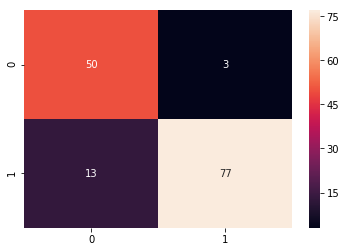

In [14]:

from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm,annot=True,fmt="d")

In [15]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86        53
         1.0       0.96      0.86      0.91        90

   micro avg       0.89      0.89      0.89       143
   macro avg       0.88      0.90      0.88       143
weighted avg       0.90      0.89      0.89       143



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


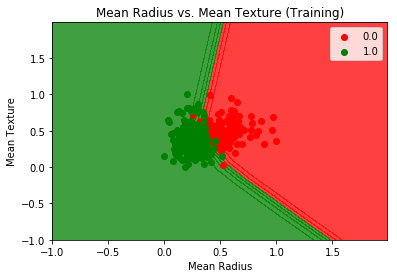

In [16]:

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_train_scaled, y_train
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Mean Radius vs. Mean Texture (Training)')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend()
plt.show()

In [17]:
weights, biases = model.layers[0].get_weights()

In [18]:
weights

array([[ 0.75452405, -0.45402873,  0.46865994,  0.06402474,  0.25764063,
        -0.18071884, -0.2856848 , -0.41300988, -0.2636667 ,  0.11113045,
        -0.10521409, -0.70495254,  0.45325115,  0.8046535 ,  0.46141714,
        -0.38228095, -0.29013142, -0.22739983, -0.34502888,  0.5224732 ],
       [ 0.09371788, -0.47927475,  0.05598645, -0.58093935,  0.83222246,
        -0.5215779 , -0.01544893,  0.2148644 , -0.20552188, -0.63117534,
        -0.00617206,  0.4800769 ,  0.35029387, -0.18041225,  0.1120199 ,
        -0.23801377, -0.19206208,  0.37333614,  0.38594866,  0.14511755]],
      dtype=float32)

In [19]:
biases

array([-0.08249652,  0.        , -0.04468346,  0.27187458,  0.27792242,
        0.        ,  0.        ,  0.17308238,  0.        ,  0.2851096 ,
        0.        ,  0.24686074, -0.02225555,  0.03453273, -0.05608426,
        0.        ,  0.        ,  0.23533937,  0.17185217, -0.07779938],
      dtype=float32)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


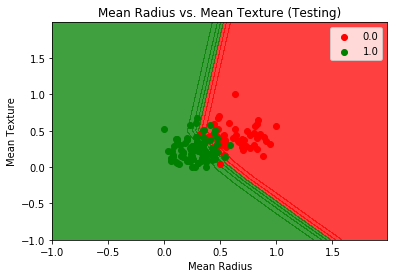

In [20]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_test_scaled, y_test
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Mean Radius vs. Mean Texture (Testing)')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend()
plt.show()

# Great Job!